In [1]:
import pandas as pd
import numpy as np

In [4]:
 df = pd.read_csv('customer_churn_data.csv')

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [7]:
df.isna().sum()


CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [8]:
df["InternetService"] = df["InternetService"].fillna("")

In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [13]:
df.duplicated().sum()

np.int64(0)

In [ ]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [15]:
numeric_columns_data.head()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32


In [16]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


<Axes: title={'center': 'Customer Distribution'}, ylabel='count'>

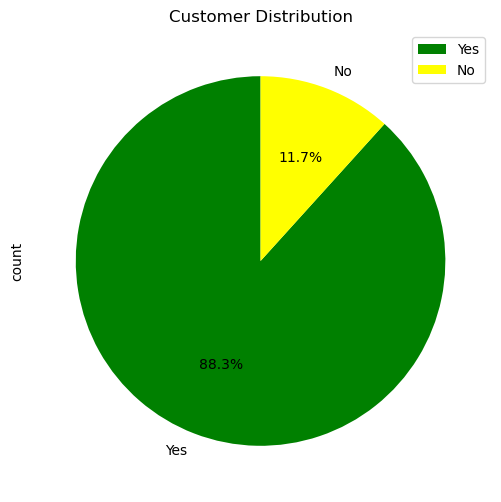

In [21]:
df['Churn'].value_counts().plot(
    kind='pie',
    colors=['green', 'yellow'],
    autopct='%1.1f%%',      # (optional) shows % values on the chart
    startangle=90,          # (optional) makes the pie start at 12 o’clock
    figsize=(6,6),          # (optional) adjusts chart size
    legend=True,            # (optional) shows a legend
    title='Customer Distribution'
)
 

In [23]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [26]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()


Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [27]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [28]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [30]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

<Axes: xlabel='ContractType'>

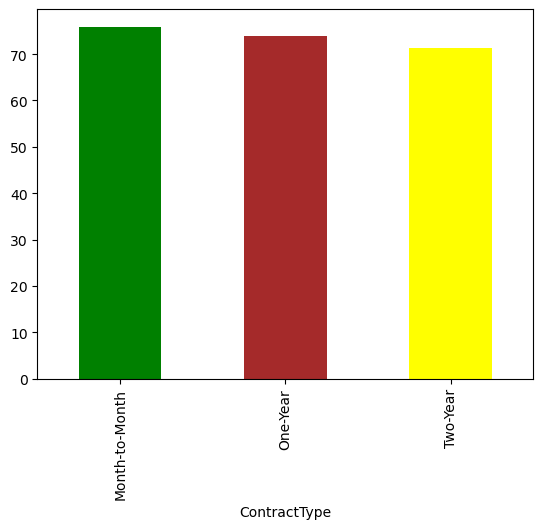

In [35]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(
    kind='bar',
    color=['green', 'brown', 'yellow']
)


At the lower terms,the monthly charge average decreases

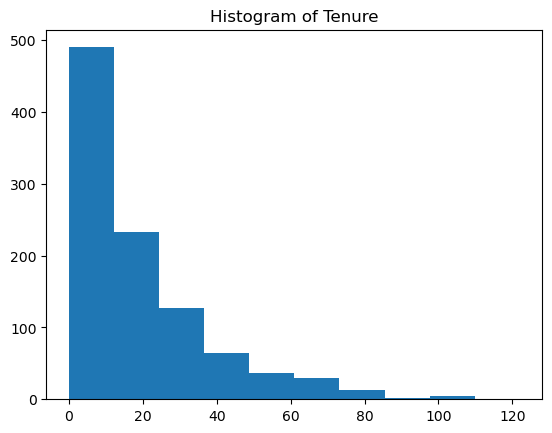

In [39]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [38]:
import matplotlib.pyplot as plt

In [40]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [59]:
y = df['Churn']
X = df[['Age', 'Gender', 'MonthlyCharges', 'Tenure']]

In [60]:
X

,Age,Gender,MonthlyCharges,Tenure
0,49,0,88.35,4
1,43,0,36.67,0
2,51,1,63.79,2
3,60,1,102.34,8
4,42,0,69.01,32
...,...,...,...,...
995,42,0,37.14,41
996,62,0,80.93,9
997,51,1,111.72,15
998,39,0,65.67,68


In [62]:
X["Gender"]

0      0
1      0
2      1
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: Gender, Length: 1000, dtype: int64

In [63]:
y.head(2)

0    Yes
1    Yes
Name: Churn, dtype: object

In [66]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

y = y.apply(lambda x: 1 if x == "Yes" else 0)


In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

ValueError: could not convert string to float: 'Month-to-Month'

In [151]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [71]:
X.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport'],
      dtype='object')

In [72]:
X = df[['Age', 'Gender', 'MonthlyCharges', 'Tenure']]


In [74]:
X.columns

Index(['Age', 'Gender', 'MonthlyCharges', 'Tenure'], dtype='object')

In [75]:
X_train = scaler.fit_transform(X_train)


ValueError: could not convert string to float: 'Month-to-Month'

In [76]:
X_train.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
566,567,24,0,60,63.61,Month-to-Month,DSL,3816.60,No
621,622,49,1,37,61.12,Month-to-Month,Fiber Optic,2261.44,No
463,464,47,1,1,104.79,Two-Year,Fiber Optic,104.79,Yes
803,804,40,0,11,32.51,Month-to-Month,,357.61,No
867,868,48,1,13,64.20,Month-to-Month,Fiber Optic,834.60,Yes


In [77]:
X = df[['Age', 'Gender', 'MonthlyCharges', 'Tenure']]


In [78]:
X['Gender'] = X['Gender'].apply(lambda g: 1 if g == 'Female' else 0)


C:\Users\hp\AppData\Local\Temp\ipykernel_22936\3995355348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].apply(lambda g: 1 if g == 'Female' else 0)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [80]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [93]:
def modelperformance(predictions):
    print("Accuracy score on model is{}".format(accuracy_score(y_test, predictions)))


In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
log_model = LogisticRegression()

In [97]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [98]:
x


,Age,Gender,MonthlyCharges,Tenure
0,49,0,88.35,4
1,43,0,36.67,0
2,51,0,63.79,2
3,60,0,102.34,8
4,42,0,69.01,32
...,...,...,...,...
995,42,0,37.14,41
996,62,0,80.93,9
997,51,0,111.72,15
998,39,0,65.67,68


In [99]:
log_model.predict([[40,0,20,50]])

array([0])

In [100]:
y_pred = log_model.predict(X_test)

In [101]:
modelperformance(y_pred)

Accuracy score on model is0.89


In [103]:
from sklearn.neighbors import KNeighborsClassifier


In [109]:
param_grid = {"n_neighbors":[3,5,7,9],
"weights" : ["uniform", "distance"],
}

In [105]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [111]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],   # ✅ correct spelling
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
gridkn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [112]:
y_pred = gridkn.predict(X_test)

In [113]:
modelperformance(y_pred)

Accuracy score on model is0.88


In [114]:
from sklearn.svm import SVC

In [115]:
svm = SVC()

In [119]:
param_grid = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"]
}

In [117]:
gridsvc = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [121]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],   # ✅ lowercase
    'gamma': ['scale', 'auto']
}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gridsvc = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
gridsvc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [122]:
gridsvc.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [123]:
y_pred = gridsvc.predict(X_test)

In [125]:
modelperformance(y_pred)

Accuracy score on model is0.89


In [126]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
param_grid = {"criterion" : ["gini","entropy"],
"splitter": ["best","random"],
"max_depth": [None,10,20,30],
"min_samples_split": [2,5,10],
"min_samples_leaf": [1,2,4]
}

In [131]:
# create GridSearchCV
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# fit
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [132]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [133]:
y_pred = grid_tree.predict(X_test)

In [134]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [136]:
modelperformance(y_pred)

Accuracy score on model is0.87


In [137]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [138]:
param_grid = {
    "n_estimators": [32, 64, 128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [139]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [140]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [141]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [143]:
modelperformance(y_pred)

Accuracy score on model is0.87


In [144]:
gridsvc.best_estimator_

SVC(C=0.01, kernel='linear')

In [145]:
best_model = gridsvc.best_estimator_

In [147]:
import joblib


In [149]:
joblib.dump(best_model, "model.pkl")


['model.pkl']

In [150]:
X.columns

Index(['Age', 'Gender', 'MonthlyCharges', 'Tenure'], dtype='object')